<a href="https://colab.research.google.com/github/fxmike/data-science-bootcamp/blob/main/06_uczenie_maszynowe/03_metryki_regresja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#problem regresji - przewidzenie ciągłej zmiennej

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [3]:
y_true = 100 + 20 * np.random.randn(50)
y_true

array([ 76.42421068,  95.43370482, 134.02290675,  81.1014517 ,
        80.30277762, 101.60068408,  71.098799  ,  68.88482811,
        73.94642779,  73.68232983, 133.7109846 ,  86.96392839,
        96.67444722, 105.33524894,  83.94236775,  97.78064584,
       102.67195979,  94.47168024, 112.03643503, 125.94332883,
        54.86634024, 142.29817945,  91.78234597, 102.83058815,
       109.22052076, 112.73409817, 110.52432588, 105.15125629,
        68.26687647, 100.68597152,  99.5857779 , 113.69618801,
       119.52338194, 116.71029002, 108.53751085, 131.84575179,
       106.50756039,  99.13256559,  83.56182873,  65.97248599,
       112.6536868 ,  85.69023653,  84.61677454,  99.56287952,
       121.16426673,  92.09688805, 115.56619205, 109.43156849,
        99.79715434, 109.80254404])

In [4]:
y_pred = y_true + 10 * np.random.randn(50)
y_pred

array([ 65.79944811, 101.58883364, 143.38185086,  85.15204624,
        74.17340076, 104.80159898,  62.16603913,  56.97580701,
        56.71507201,  69.76541939, 128.75382246,  75.14337305,
        96.66523059, 116.34973907, 100.5395901 ,  89.26332909,
       105.61388816,  87.9840886 , 123.06580445, 137.85470435,
        55.75163998, 130.66644206,  97.71692828,  92.84154152,
       107.65244751, 108.6519226 , 100.07016857, 100.03700476,
        61.37633393, 101.84207988,  99.72637017, 133.77964422,
       108.16904106, 127.4776196 , 107.58434839, 140.07886027,
       105.57420186,  92.85255818,  74.32635044,  73.11655031,
       111.40743502,  75.79602463,  72.93499314,  99.96270044,
       109.30077015,  73.2746357 , 136.4418986 , 107.35636566,
        97.51435451,  94.08682397])

In [5]:
results = pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
results.head()

,y_true,y_pred
0,76.424211,65.799448
1,95.433705,101.588834
2,134.022907,143.381851
3,81.101452,85.152046
4,80.302778,74.173401


In [6]:
results['error'] = results['y_true'] - results['y_pred']
results.head()

,y_true,y_pred,error
0,76.424211,65.799448,10.624763
1,95.433705,101.588834,-6.155129
2,134.022907,143.381851,-9.358944
3,81.101452,85.152046,-4.050595
4,80.302778,74.173401,6.129377


In [21]:
def plot_regression_results(y_true, y_pred):
  result = pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
  min = result[['y_true', 'y_pred']].min().min()
  max = result[['y_true', 'y_pred']].max().max()

  fig = go.Figure(data=[go.Scatter(x=results['y_true'], y=results['y_pred'], mode='markers'),
                        go.Scatter(x=[min, max], y=[min, max])],
                  layout=go.Layout(showlegend=False, width=800,
                                   xaxis_title='y_true',
                                   yaxis_title='y_pred',
                                   title='regression results'))
  fig.show()


In [22]:
plot_regression_results(y_true, y_pred)

In [23]:
y_true = 100 + 20 * np.random.randn(1000)
y_pred = y_true + 10 * np.random.randn(1000)

results = pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
results['error'] = results['y_true'] - results['y_pred']


In [24]:
px.histogram(results, x='error', nbins=50, width=800)

In [26]:
# histogram przypominać będzie rozkład normalny, lecz czasem może być lewo lub prawoskośny i będzie mówił o tym czy model przeszacowuje/niedoszacowuje wartości
# więcej po prawej: model niedoszacowuje
# więcej po lewej: model przeszacowuje
# najlepiej żeby błędy były skupione wokół 0

Mean Absolute Error - średni błąd bezwzględny

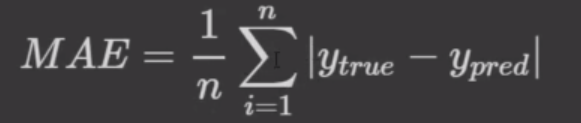

In [27]:
def mae(y_true, y_pred):
  return abs(y_true - y_pred).sum() / len(y_true)

In [31]:
mae(y_true, y_pred).round(2)

8.1

In [32]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_pred)

8.103423733256703

Mean Squared Error - MSE - Błąd średniokwadratowy

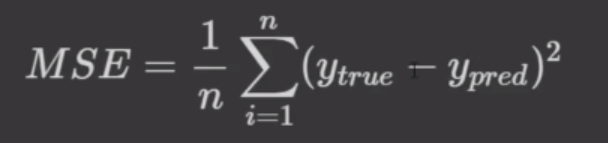

In [33]:
def mse(y_true, y_pred):
  return ((y_true - y_pred) ** 2).sum() / len(y_true)

mse(y_true, y_pred)
#mse bardziej kara błędy mocniej odchylone

103.83963149900836

In [39]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true, y_pred)

103.83963149900836

Root Mean Squared Error - RMSE - Pierwiastek błędu średniokwadratowego

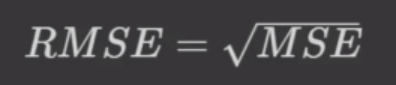

In [34]:
#jak średnio nasze predykcje odbiegają od wartości prawdziwych

In [36]:
def rmse(y_true, y_pred):
  return np.sqrt(((y_true - y_pred) ** 2).sum() / len(y_true))

rmse(y_true, y_pred)

10.190173281108049

In [40]:
np.sqrt(mean_squared_error(y_true, y_pred))

10.190173281108049

Błąd maksymalny

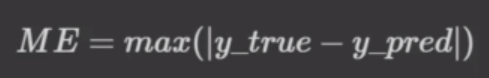

In [44]:
def maxerror(y_true, y_pred):
  return abs(y_true - y_pred).max()

In [45]:
maxerror(y_true, y_pred)

35.41612264300237

In [46]:
from sklearn.metrics import max_error

max_error(y_true, y_pred)

35.41612264300237

R2 score - współczynnik determinacji

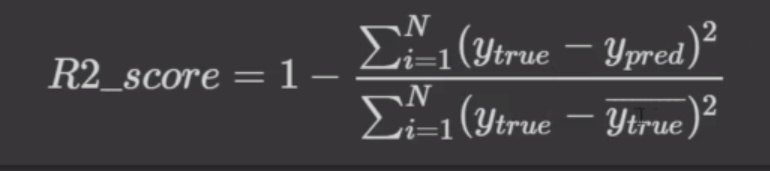

In [47]:
#jak model (predykcje) działają lepiej niż jeśli zmienna y_true byłaby średnią z tej zmiennej

In [48]:
from sklearn.metrics import r2_score

r2_score(y_true, y_pred)

0.7244793816374444

In [49]:
def r2(y_true, y_pred):
  numerator = ((y_true - y_pred) ** 2).sum()
  denominator = ((y_true - y_true.mean()) ** 2).sum()

  try:
    r2 = 1 - numerator / denominator
  
  except ZeroDivisionError:
    print('dzielenie przez 0')

  return r2

In [50]:
r2(y_true, y_pred)

0.7244793816374444